In [38]:
import os
import numpy as np
import pandas as pd
from matplotlib.image import imread
from tensorflow.keras.metrics import AUC as auc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = 'chest_xray'

In [3]:
os.listdir(data_dir)

['test', 'train', 'val']

In [4]:
test_path = data_dir + '/test'
train_path = data_dir + '/train'
val_path = data_dir + '/val'

In [5]:
os.listdir(test_path)

['PNEUMONIA', 'NORMAL']

In [6]:
os.listdir(train_path + '/pneumonia')[0]

'person63_bacteria_306.jpeg'

In [7]:
positive = train_path + '/pneumonia/' + 'person63_bacteria_306.jpeg'
pos_image = imread(positive)
pos_image.shape

(736, 1048)

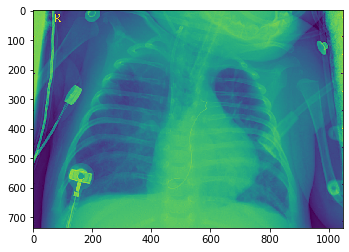

In [8]:
plt.imshow(pos_image)

In [9]:
len(os.listdir(train_path + '/pneumonia'))

3875

In [10]:
len(os.listdir(train_path + '/normal'))

1341

In [11]:
# We're going to have images of different dimensions, so handle that before using the CNN
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + '/normal'):
    img = imread(test_path + '/normal/' + image_filename)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

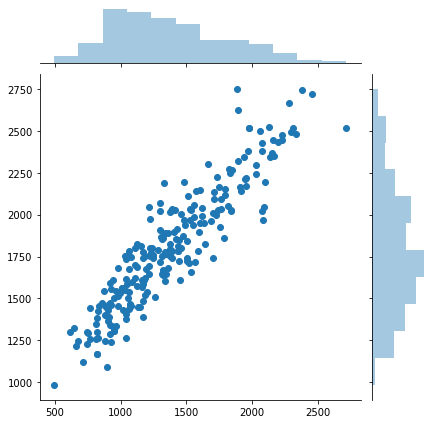

In [12]:
# Plot the image sizes
sns.jointplot(dim1, dim2)

In [13]:
# Going to get the mean image size and resize to that
np.mean(dim1)

1369.0897435897436

In [14]:
np.mean(dim2)

1800.3034188034187

In [15]:
image_shape = (1369, 1800, 1)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
image_gen = ImageDataGenerator(horizontal_flip=True,
                               fill_mode='nearest')

In [18]:
image_gen.flow_from_directory(train_path)

Found 5216 images belonging to 2 classes.


In [19]:
image_gen.flow_from_directory(test_path)

Found 624 images belonging to 2 classes.


In [20]:
image_gen.flow_from_directory(val_path)

Found 16 images belonging to 2 classes.


<h2>Building a Model</h2>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [40]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

ValueError: Unknown metric function:auc

In [ ]:
model.summary()

<h2>Regularization</h2>

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 16

In [26]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size = image_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary',
                                               shuffle=False) # Don't want to shuffle test data and lose labels

Found 624 images belonging to 2 classes.


In [31]:
test_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

<h3>Running the Model</h3>

In [33]:
# # Running without early stop for now - not enough examples for 'val_loss'?
# results = model.fit(train_image_gen, epochs=20,
#                              validation_data=test_image_gen,
# #                     callbacks=[early_stop]
#                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 326 steps, validate for 39 steps
Epoch 1/20
  1/326 [..............................] - ETA: 13:35

KeyboardInterrupt: 